In [ ]:
"""
CLEAN BIG DATA FILES (995,000_rows.csv for example...)

- input: CSV-file
- output: new csv files, splitted in chunks, for easier access (cause of size). Saved at 'FakeNewsCorpus_chunks/'.

"""


import pandas as pd
from CleanData import *
import os


df = pd.read_csv('995,000_rows.csv', chunksize=20000)

for i, chunk in enumerate(df):
    temp_input_csv = f"TEMPORARY_{i}.csv"                    # Temporary input filename
    cleaned_csv = f"cleaned_chunk_{i}.csv"                   # Output cleaned chunk filename
    
    chunk.to_csv(temp_input_csv, index=False)                # Save chunk as temp_input.CSV
    full_cleaning(temp_input_csv, cleaned_csv)               # 'Full_Cleaning' function
    
    os.remove(temp_input_csv)                                # Remove 'temp' after use

print("Saved the CSV into CLEANED chunk.csv files")

Total vocabulary BEFORE stop-word removal: 194649
Total vocabulary AFTER stop-word removal: 194503
Reduction Rate AFTER stop-word removal: 0.08%
Total vocabulary AFTER stemming: 154535
Reduction Rate AFTER stemming): 20.55%
Saved: cleaned_chunk_0.csv
Total vocabulary BEFORE stop-word removal: 200181
Total vocabulary AFTER stop-word removal: 200040
Reduction Rate AFTER stop-word removal: 0.07%
Total vocabulary AFTER stemming: 160735
Reduction Rate AFTER stemming): 19.65%
Saved: cleaned_chunk_1.csv
Total vocabulary BEFORE stop-word removal: 198293
Total vocabulary AFTER stop-word removal: 198151
Reduction Rate AFTER stop-word removal: 0.07%
Total vocabulary AFTER stemming: 158444
Reduction Rate AFTER stemming): 20.04%
Saved: cleaned_chunk_2.csv
Total vocabulary BEFORE stop-word removal: 190468
Total vocabulary AFTER stop-word removal: 190324
Reduction Rate AFTER stop-word removal: 0.08%
Total vocabulary AFTER stemming: 151542
Reduction Rate AFTER stemming): 20.38%
Saved: cleaned_chunk_3.

Total vocabulary AFTER stemming: 152895
Reduction Rate AFTER stemming): 20.39%
Saved: cleaned_chunk_32.csv
Total vocabulary BEFORE stop-word removal: 194096
Total vocabulary AFTER stop-word removal: 193954
Reduction Rate AFTER stop-word removal: 0.07%
Total vocabulary AFTER stemming: 154591
Reduction Rate AFTER stemming): 20.30%
Saved: cleaned_chunk_33.csv
Total vocabulary BEFORE stop-word removal: 198704
Total vocabulary AFTER stop-word removal: 198564
Reduction Rate AFTER stop-word removal: 0.07%
Total vocabulary AFTER stemming: 159457
Reduction Rate AFTER stemming): 19.69%
Saved: cleaned_chunk_34.csv
Total vocabulary BEFORE stop-word removal: 194015
Total vocabulary AFTER stop-word removal: 193873
Reduction Rate AFTER stop-word removal: 0.07%
Total vocabulary AFTER stemming: 154941
Reduction Rate AFTER stemming): 20.08%
Saved: cleaned_chunk_35.csv
Total vocabulary BEFORE stop-word removal: 196395
Total vocabulary AFTER stop-word removal: 196252
Reduction Rate AFTER stop-word removal

In [23]:
"""
MERGE ALL CLEANED_CHUNKS.csv files into a single CSV file again.

- input: CSV-files (e.g: all the chunks from a specific folder)
- output: A single merged CSV file

"""

import pandas as pd
import glob

# Step 1: Get all CSV files (CHUNKS)
csv_files = glob.glob("FakeNewsCorpus_chunks/cleaned_chunk_*.csv")

# Step 2: Load and stack all CSV files into a single CSV
df_combined = pd.concat([pd.read_csv(f) for f in csv_files])

# Step 3: Save the merged CSV
df_combined.to_csv("FakeNewsCorpus_chunks/merged_cleaned.csv", index=False)

print(f"Merged {len(csv_files)} CSV files into 'FakeNewsCorpus_chunks/merged_cleaned.csv'")

Merged 50 CSV files into 'FakeNewsCorpus_chunks/merged_cleaned.csv'


# -------------------------------------------------------------------------------------
# Exploring the dataset (observations and discoveries)
# -------------------------------------------------------------------------------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Display descriptive statistics for both numeric and object
# With missing values per column
df = pd.read_csv("merged_cleaned.csv")
print("Descriptive Statistics:")
print(df.describe(include='all'))
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Count unique values in 'source' and 'type'
print("\nUnique counts in 'source':")
print(df['source'].value_counts(dropna=False))
print("\nUnique counts in 'type':")
print(df['type'].value_counts(dropna=False))

/var/folders/mf/v804nnb977xcmlvlg__nj1dw0000gn/T/ipykernel_23439/1645512964.py:8: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_cleaned.csv")


Descriptive Statistics:
        Unnamed: 0         id       domain      type  \
count     994999.0   994993.0       994989    947214   
unique     26113.0   994993.0          683        13   
top         4062.0  7444726.0  nytimes.com  reliable   
freq          99.0        1.0       176144    218564   
mean           NaN        NaN          NaN       NaN   
std            NaN        NaN          NaN       NaN   
min            NaN        NaN          NaN       NaN   
25%            NaN        NaN          NaN       NaN   
50%            NaN        NaN          NaN       NaN   
75%            NaN        NaN          NaN       NaN   
max            NaN        NaN          NaN       NaN   

                                                      url  \
count                                              994989   
unique                                             994090   
top     https://counterjihad.com/cdn-cgi/l/email-prote...   
freq                                                    3  

In [4]:
df = pd.read_csv("merged_cleaned.csv", low_memory=False)

# Drop uninformative columns
df = df.drop(columns=['Unnamed: 0', 'keywords', 'summary'], errors='ignore')


Token Count Statistics per Article:
count    995000.000000
mean        273.114662
std         391.817224
min           1.000000
25%          65.000000
50%         176.000000
75%         352.000000
max       17067.000000
Name: token_count, dtype: float64


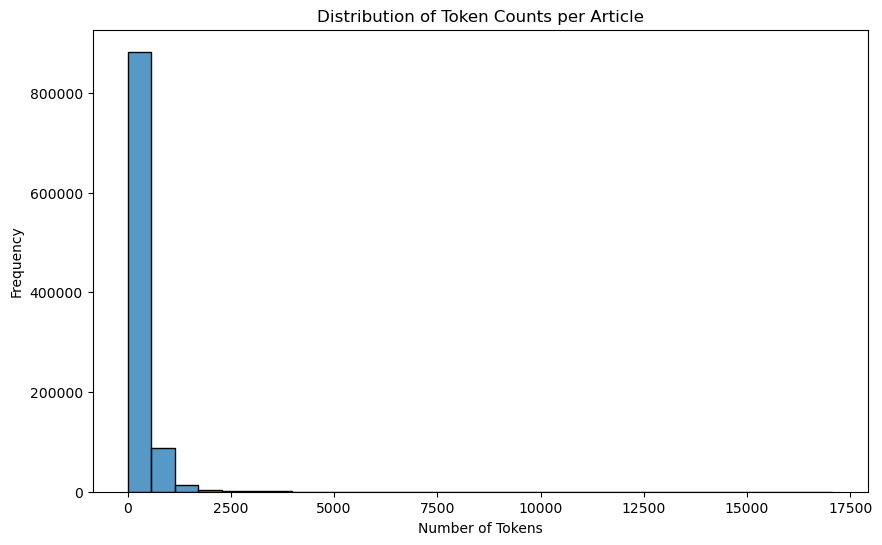

In [5]:
df['token_count'] = df['content'].astype(str).apply(lambda x: len(x.split()))

# Display statistics for token counts
print("\nToken Count Statistics per Article:")
print(df['token_count'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['token_count'], bins=30, kde=False)
plt.title("Distribution of Token Counts per Article")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()


Top 100 Frequent Tokens:
'<NUM>',: 6978624
'said',: 1400492
'one',: 1109792
'new',: 1048909
'<DATE>',: 992553
'us',: 958154
'would',: 956848
'state',: 942074
'peopl',: 914823
'year',: 905332
'time',: 892552
'like',: 834469
'use',: 701369
'also',: 689817
'make',: 621403
'say',: 596135
'mr',: 591252
'go',: 581062
'get',: 577639
'even',: 568428
'govern',: 535964
'presid',: 532055
'work',: 521967
'american',: 516769
'report',: 511210
'nation',: 507111
'right',: 506311
'first',: 495800
'trump',: 494307
'two',: 491093
'could',: 486578
'come',: 485413
'mani',: 484449
'obama',: 482208
'news',: 474344
'day',: 460892
'world',: 454448
'continu',: 452030
'take',: 448339
'stori',: 445940
'call',: 436126
'last',: 430597
'read',: 427747
'want',: 423184
'see',: 422440
'includ',: 412700
'know',: 411001
'may',: 409249
'way',: 408690
'think',: 405618
'countri',: 399973
'back',: 397625
'need',: 390533
'public',: 387245
'support',: 381963
'polit',: 374925
'well',: 374128
'unit',: 362094
'tri',: 356254
'ir

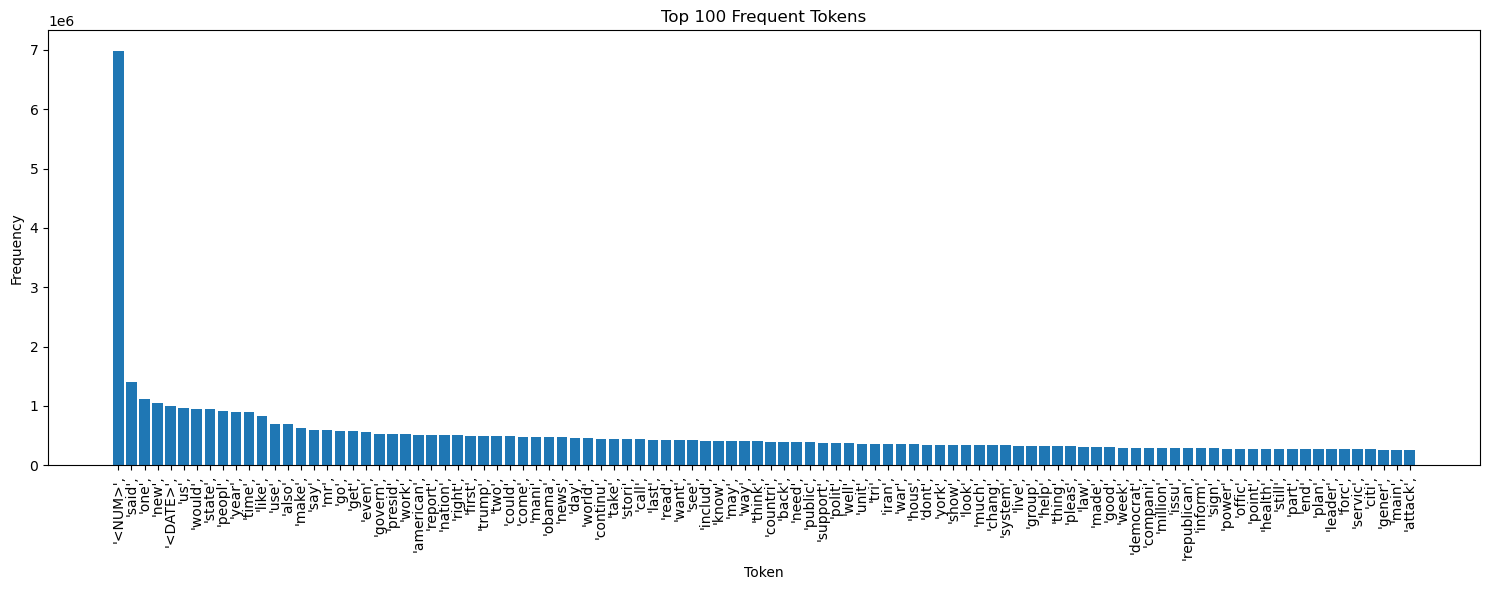

In [6]:
all_tokens = Counter()
for text in df['content'].dropna():
    tokens = text.split()       # Split the tokenized text into individual tokens
    all_tokens.update(tokens)

# Get the top 100 frequent tokens
top_100_tokens = all_tokens.most_common(100)
print("\nTop 100 Frequent Tokens:")
for token, freq in top_100_tokens:
    print(f"{token}: {freq}")

# Convert the top 100 tokens to a DataFrame for plotting
top_tokens_df = pd.DataFrame(top_100_tokens, columns=['token', 'frequency'])

# Visualize the top 100 bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_tokens_df['token'], top_tokens_df['frequency'])
plt.xticks(rotation=90)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Top 100 Frequent Tokens")
plt.tight_layout()
plt.show()